<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EB%8B%A8%EC%88%9C%EA%B0%9D%EC%B2%B4%ED%83%90%EC%A7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - bbox_output_loss: 0.1401 - bbox_output_mse: 0.1402 - class_output_accuracy: 0.3308 - class_output_loss: 1.6071 - loss: 1.7475
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - bbox_output_loss: 0.0855 - bbox_output_mse: 0.0855 - class_output_accuracy: 0.3320 - class_output_loss: 1.0987 - loss: 1.1842
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - bbox_output_loss: 0.0849 - bbox_output_mse: 0.0849 - class_output_accuracy: 0.3327 - class_output_loss: 1.0988 - loss: 1.1837
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - bbox_output_loss: 0.0858 - bbox_output_mse: 0.0858 - class_output_accuracy: 0.3439 - class_output_loss: 1.0985 - loss: 1.1843
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - bbox_output_loss: 0.0853 - bbox_output_mse: 0.0854 - class_output_accuracy: 0.3585 - class_output_loss: 1.0983 - loss: 1.1836
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
Predicted Class: [2]
Predicted Bounding Box (x, y, w, h): [0.505052   

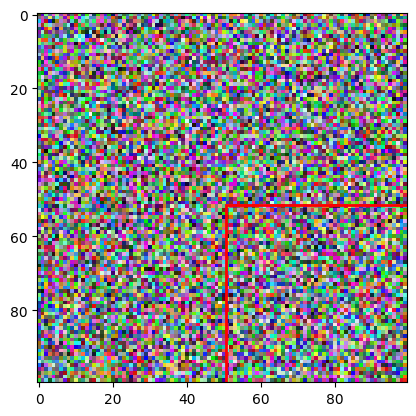

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model

# 데이터 생성
num_samples = 1000
num_classes = 3  # 클래스 개수 (예: 개, 고양이, 자동차)

X_train = np.random.rand(num_samples, 100, 100, 3).astype(np.float32)  # 랜덤 이미지 데이터
y_class_train = tf.keras.utils.to_categorical(np.random.randint(0, num_classes, num_samples), num_classes)
y_bbox_train = np.random.rand(num_samples, 4).astype(np.float32)  # 바운딩 박스 (정규화됨)

# 모델 정의
inputs = layers.Input(shape=(100, 100, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)

class_output = layers.Dense(128, activation='relu')(x)
class_output = layers.Dense(num_classes, activation='softmax', name="class_output")(class_output)

bbox_output = layers.Dense(128, activation='relu')(x)
bbox_output = layers.Dense(4, activation='sigmoid', name="bbox_output")(bbox_output)  # 0~1 정규화

model = Model(inputs=inputs, outputs=[class_output, bbox_output])
model.compile(optimizer='adam',
              loss={'class_output': 'categorical_crossentropy', 'bbox_output': 'mean_squared_error'},
              metrics={'class_output': 'accuracy', 'bbox_output': 'mse'})

# 모델 학습
model.fit(X_train, {'class_output': y_class_train, 'bbox_output': y_bbox_train},
          epochs=5, batch_size=32, verbose=1)

# 예측 및 시각화
X_test = np.random.rand(1, 100, 100, 3).astype(np.float32)
y_pred_class, y_pred_bbox = model.predict(X_test)
predicted_class = np.argmax(y_pred_class, axis=1)
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Bounding Box (x, y, w, h): {y_pred_bbox[0]}")

def plot_bounding_box(image, bbox):
    plt.imshow(image)
    x, y, w, h = bbox * 100  # 정규화 해제
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
    plt.show()

plot_bounding_box(X_test[0], y_pred_bbox[0])